# Lotto Number Predictions

This notebook performs a download of the most recent winning numbers from the Lotto649 (a lottery managed by the **British Columbia Lotto Corporation** in BC, Canada), and performs basic number analysis on them in order to describe the most winningest numbers in history.



## Resources

In [6]:
# Main Getter Function

import sys
import pandas as pd
import urllib.request
import zipfile

# Download 
def dl_file(url, data_path, file_name):
    print("### Downloading " + url + " and saving as " + data_path + file_name)
    urllib.request.urlretrieve(url, data_path + file_name)
    
    
# Unzip
def unzip(data_path, file_name):
  print("### Unzipping " + file_name + " at " + data_path)
  #extension = ".zip"

  zip_ref = zipfile.ZipFile(data_path + file_name, 'r')
  zip_ref.extractall(data_path)
  zip_ref.close()

# Variables - TODO - make abstract to handle other sets
url = "http://www.bclc.com/documents/DownloadableNumbers/CSV/649.zip"
data_path = "data/"
file_name = "649"

# download zip file and save
dl_file(url, data_path, file_name)

# unzip to csv
unzip(data_path, file_name)


### Downloading http://www.bclc.com/documents/DownloadableNumbers/CSV/649.zip and saving as data/649
### Unzipping 649 at data/


## Conversion

In [7]:
import csv
import pandas as pd


def read_csv(data_path, file_name):
    extension = ".csv"
    path = data_path + file_name + extension
    print("### Reading " + path)
    index = 0

    with open(path, newline='') as f:
        #reader = csv.reader(f, delimiter=',')
        reader = pd.read_csv(path)
        reader.set_index("DRAW NUMBER", inplace=True)
        for row in reader:
            print(', '.join(row))
            index += 1

        row_count = sum(1 for row in reader)
        print("Read " + str(index) + " lines")
        return reader


In [8]:
base_reader = pd.read_csv(data_path + file_name + ".csv")
base_reader.set_index("DRAW NUMBER", inplace=True)
base_reader.tail()

,PRODUCT,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
DRAW NUMBER,,,,,,,,,,
3489,649,0,2017-06-28,8,21,25,34,46,48,4
3490,649,0,2017-07-01,15,16,22,33,37,41,27
3491,649,0,2017-07-05,4,9,33,36,47,49,10
3492,649,0,2017-07-08,20,25,26,32,34,36,9
3493,649,0,2017-07-12,12,13,30,41,45,49,16


In [11]:
draws = base_reader[["NUMBER DRAWN 1","NUMBER DRAWN 2","NUMBER DRAWN 3","NUMBER DRAWN 4","NUMBER DRAWN 5","NUMBER DRAWN 6"]]
draws.tail()


,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6
DRAW NUMBER,,,,,,
3489,8,21,25,34,46,48
3490,15,16,22,33,37,41
3491,4,9,33,36,47,49
3492,20,25,26,32,34,36
3493,12,13,30,41,45,49


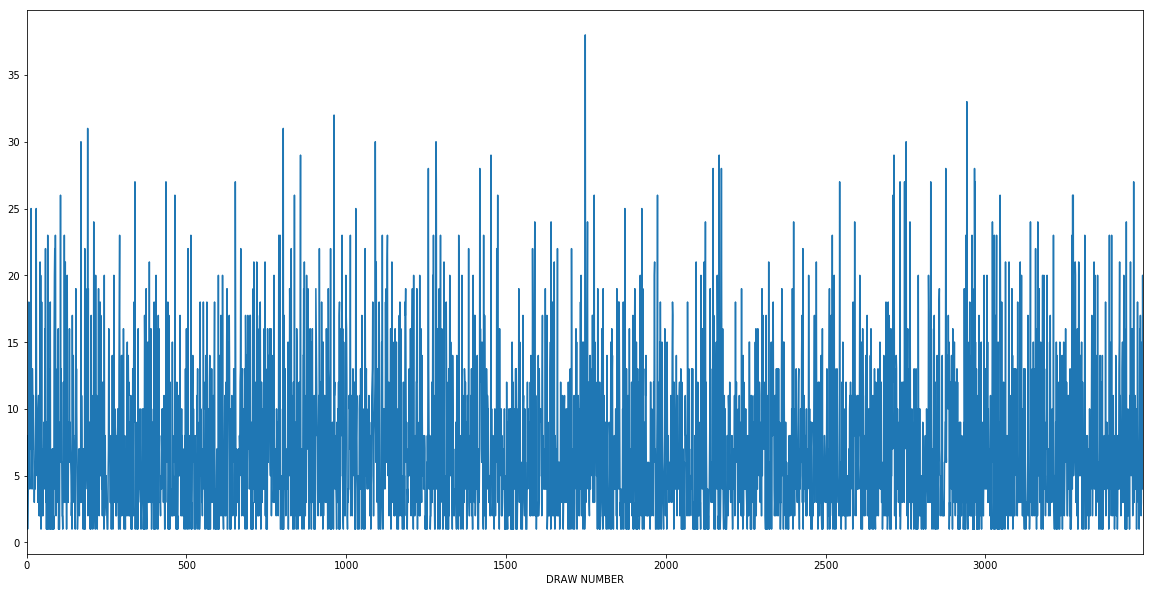

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

draws["NUMBER DRAWN 1"].plot()
plt.show()

## Analysis

In [15]:
draw_one = draws[["NUMBER DRAWN 1"]]
draw_one.head()

,NUMBER DRAWN 1
DRAW NUMBER,
1,3
2,8
3,1
4,3
5,5


In [47]:
# store min
draw_one_min = draw_one.min()
draw_one_min.item()

1

In [46]:
# store max
draw_one_max = draw_one.max()
draw_one_max.item()

38

In [48]:
# unique
dovc = draw_one['NUMBER DRAWN 1'].value_counts()
dovc.columns = ["value"]
dovc


1     416
2     383
4     341
3     340
5     257
6     228
7     226
9     185
8     183
10    146
11    139
12    120
13     99
14     70
15     66
16     65
17     53
18     45
20     42
19     39
21     26
23     26
22     16
24     12
27     10
26     10
28      6
25      5
30      4
29      4
31      2
33      1
32      1
38      1
Name: NUMBER DRAWN 1, dtype: int64

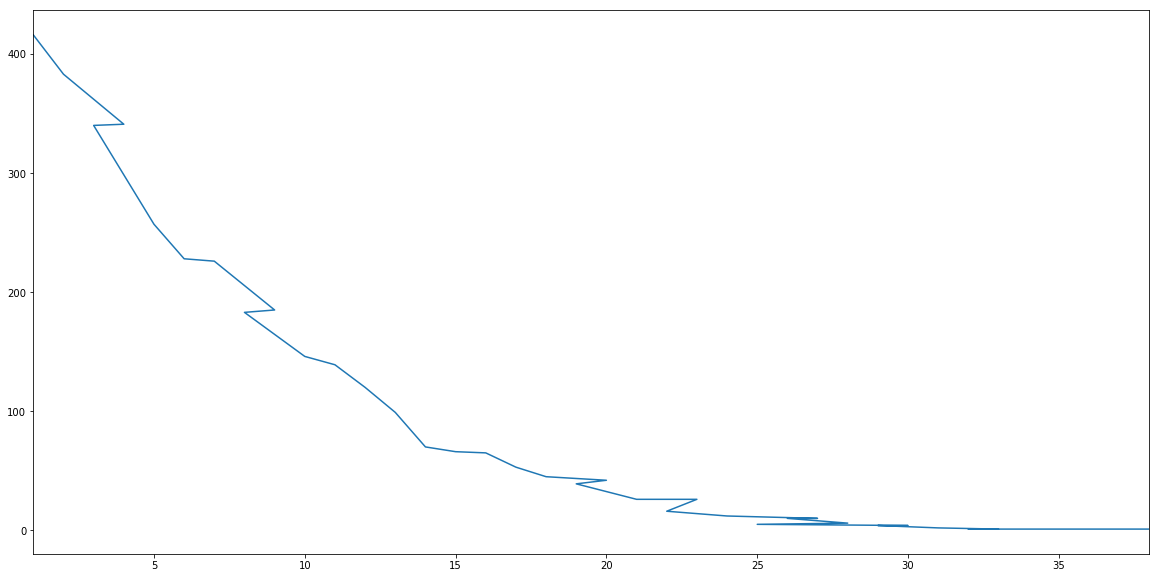

In [29]:
dovc.plot()

In [49]:
dom = dovc.to_frame()
dom.columns = ["value"]

max_one = dom.iloc[0]
max_one.item()


416

## Max Numbers

In [59]:

total_counts = []
total_values = []
for index, column in enumerate(draws.columns):
    df = draws[column].value_counts().to_frame()
    df.columns = ["value"]
    val = df.iloc[0]
    total_counts.append(val.name)
    total_values.append(val.value)
    print("Most drawn number for %s is the number %s at %s times" % (draws.columns[index], str(val.name), str(val.item())) )

Most drawn number for NUMBER DRAWN 1 is the number 1 at 416 times
Most drawn number for NUMBER DRAWN 2 is the number 12 at 190 times
Most drawn number for NUMBER DRAWN 3 is the number 22 at 175 times
Most drawn number for NUMBER DRAWN 4 is the number 31 at 193 times
Most drawn number for NUMBER DRAWN 5 is the number 38 at 205 times
Most drawn number for NUMBER DRAWN 6 is the number 49 at 433 times


In [52]:
total_counts

[1, 12, 22, 31, 38, 49]

In [53]:
total_values

[416, 190, 175, 193, 205, 433]

In [91]:
index = ['1','2','3','4','5','6']
count = 'number chosen'
value = 'times chosen'
columns = [count,value]
df = pd.DataFrame(index=index, columns=columns)
df[count] = total_counts
df[value] = total_values


In [92]:
df

,number chosen,times chosen
1,1,416
2,12,190
3,22,175
4,31,193
5,38,205
6,49,433
